# 01 - Plot Bomb Cyclone on 2021-10-26

In [1]:
# import a few libraries and functions
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import pandas as pd

from qartod_testing.data_processing import load_gross_range_qartod_test_values, load_climatology_qartod_test_values
from ooi_data_explorations.common import load_kdata

In [2]:
# load data from kdata server for METBK package that shows cyclone most clearly
refdes = 'CP01CNSM-SBD11-06-METBKA000'
site, node, sensor = refdes.split('-',2)
method = 'recovered_host'
stream = 'metbk_hourly'
deploy = 14
metbk = load_kdata(site, node, sensor, method, stream, tag=('*deployment%04d*.nc' % deploy))

Loading and Processing Data Files: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


In [3]:
# check what's in here
metbk

# relevant variables include barometric_pressure, barometric_pressure_qc_executed, and barometric_pressure_qc_results

<xarray.Dataset>
Dimensions:                              (time: 337570)
Coordinates:
  * time                                 (time) datetime64[ns] 2021-03-31T15:...
Data variables: (12/72)
    deployment                           (time) int32 14 14 14 14 ... 14 14 14
    northward_velocity                   (time) float64 nan nan ... nan -0.05288
    eastward_velocity                    (time) float64 nan nan ... nan -0.1185
    shortwave_irradiance_qc_results      (time) float32 21.0 21.0 ... 29.0 nan
    air_temperature                      (time) float64 12.37 12.37 ... 11.37
    barometric_pressure                  (time) float64 1.023e+03 ... 1.022e+03
    ...                                   ...
    met_frshflx_qc_executed              (time) float32 nan nan nan ... nan 16.0
    met_rainrte_qc_executed              (time) float32 nan nan nan ... nan 29.0
    met_buoyflx_qc_executed              (time) float32 nan nan nan ... nan 16.0
    met_heatflx                          (time) float64 nan nan ... nan -190.5
    met_frshflx                          (time) float64 nan nan ... nan 0.2342
    met_sphum2m_qc_results               (time) float32 nan nan nan ... nan 13.0
Attributes: (12/69)
    node:                               RID26
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_host
    stream:                             velpt_ab_dcl_instrument_recovered
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                40.132833
    lon:                                -70.778

In [4]:
# grab just barometric pressure for now, and check that I did it right
atm_pressure = metbk['barometric_pressure']
atm_pressure

<xarray.DataArray 'barometric_pressure' (time: 337570)>
array([1023.28997803, 1023.35998535, 1023.15002441, ..., 1022.17999268,
       1022.04998779, 1022.04998779])
Coordinates:
  * time     (time) datetime64[ns] 2021-03-31T15:36:02.312000512 ... 2021-11-...
Attributes:
    _FillValue:               -9999999.0
    comment:                  Barometric Pressure is a measure of the weight ...
    long_name:                Barometric Pressure
    precision:                2
    coordinates:              time lat lon
    data_product_identifier:  BARPRES_L0
    units:                    mbar

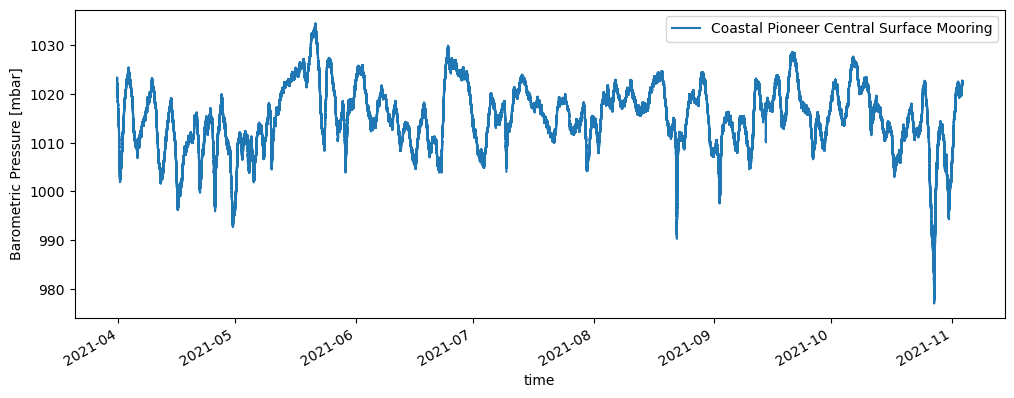

In [25]:
# plot full deployment of barometric pressure
atm_pressure.plot(figsize=(12,4), label='Coastal Pioneer Central Surface Mooring')
plt.legend()

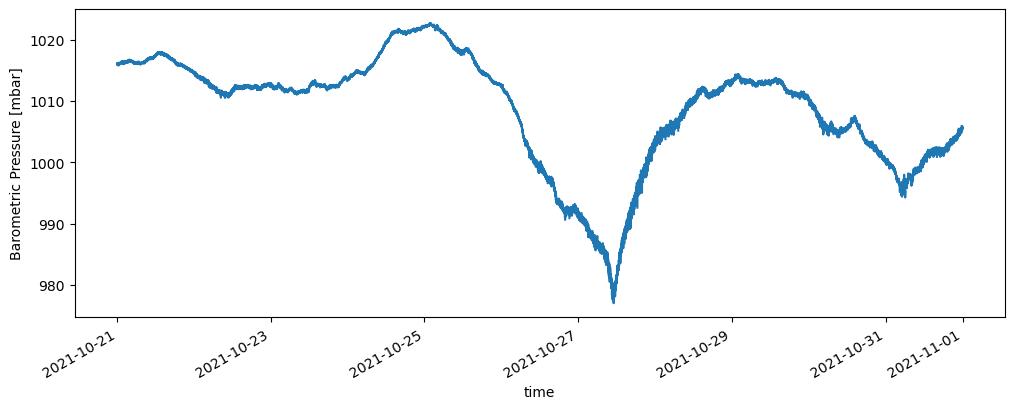

In [7]:
# plot barometric pressure during event on 2021-10-26 +-5 days
atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(12,4))

In [15]:
# import gross range qartod test lookup table
grlim = load_gross_range_qartod_test_values(refdes, stream, 'barometric_pressure')
grlim

,subsite,node,sensor,stream,parameters,qcConfig,source,notes


In [6]:
# import climatology qartod test lookup table
clim = load_climatology_qartod_test_values(refdes, 'barometric_pressure')
clim

,"[1, 1]","[2, 2]","[3, 3]","[4, 4]","[5, 5]","[6, 6]","[7, 7]","[8, 8]","[9, 9]","[10, 10]","[11, 11]","[12, 12]"
"[0, 0]","[984.231, 1048.8239]","[985.6537, 1046.5735]","[986.7057, 1044.974]","[988.7984, 1042.0441]","[992.8742, 1036.8035]","[998.7187, 1030.233]","[1001.205, 1028.3706]","[1002.8057, 1028.8386]","[998.4263, 1035.723]","[994.7398, 1040.9632]","[991.0711, 1044.5556]","[989.6853, 1044.7099]"


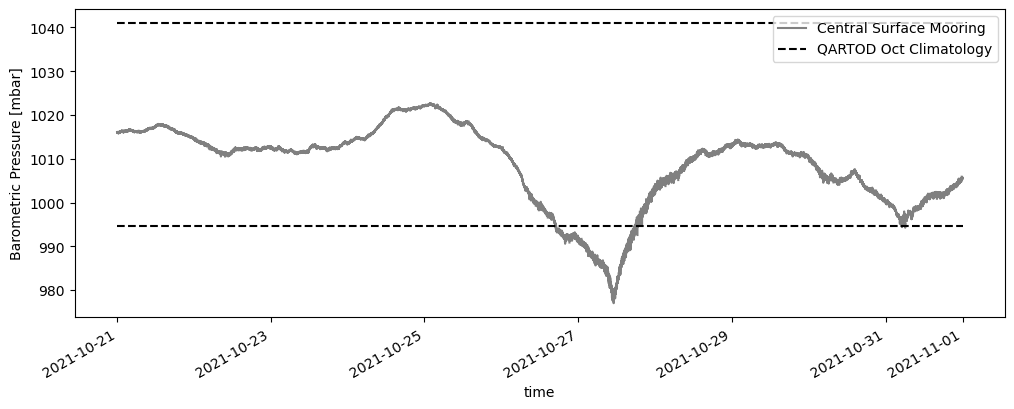

In [7]:
# plot barometric pressure during event with monthly climatology lines
atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(12,4), label='Central Surface Mooring', color='gray')
plt.hlines(clim['[10, 10]']['[0, 0]'], pd.to_datetime('2021-10-21'), pd.to_datetime('2021-11-01'), colors='black', linestyles='dashed', label='QARTOD Oct Climatology')
plt.legend()

Now that we've loaded the test values into the workspace, we can call any of the tuples of test range values with a command of the form `df['column_label']['row_label']`.

In [7]:
# Get subset of data that would be flagged as suspect by QARTOD flags
suspect_pressure = atm_pressure.where(atm_pressure.sel(time=slice('2021-10-21','2021-10-31'))<=clim['[10, 10]']['[0, 0]'][0])
suspect_pressure

<xarray.DataArray 'barometric_pressure' (time: 17165)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2021-10-21 ... 2021-10-31T23:59:59.798999552
Attributes:
    _FillValue:               -9999999.0
    comment:                  Barometric Pressure is a measure of the weight ...
    long_name:                Barometric Pressure
    precision:                2
    coordinates:              time lat lon
    data_product_identifier:  BARPRES_L0
    units:                    mbar

Text(0.5, 1.0, 'October 2021 Bomb Cyclone at Pioneer NES Central Surface Mooring (CP01CNSM) \n Recovered Host Hourly Barometric Pressure')

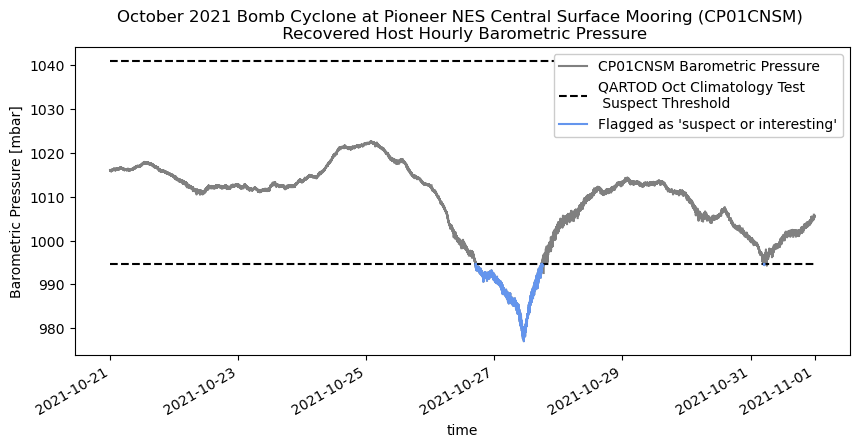

In [23]:
# plot this subset over the plot above showing the barometric pressure time series around this event
atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(10,4), label='CP01CNSM Barometric Pressure', color='gray')
# atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(10,4), color='gray')
plt.hlines(clim['[10, 10]']['[0, 0]'], pd.to_datetime('2021-10-21'), pd.to_datetime('2021-11-01'), colors='black', linestyles='dashed', label='QARTOD Oct Climatology Test \n Suspect Threshold')
suspect_pressure.plot(color='cornflowerblue', label="Flagged as 'suspect or interesting'")
plt.legend(framealpha=1)
plt.title('October 2021 Bomb Cyclone at Pioneer NES Central Surface Mooring (CP01CNSM) \n Recovered Host Hourly Barometric Pressure')

Are there gross range limits for the QARTOD test available that I should be showing so that people can't say this data is "bad/fail"?